在第一章，我们强调了概率论在解决模式识别问题中的起到的重要作用。现在将目标转向一些特别的概率分布和他们的特性的探索。出于对它们的极大兴趣，这些分布构成了更复杂模型的基石，将在本书中大量使用。本章中介绍的分布也将有着其它重要的目的，这里也提供给我们讨论一些统计中的关键概率的机会，比如统计推断，之前我们提到的一些简单方法的内容，也会在后面章节中更复杂的场景中出现。

本章中讨论的分布的一个角色就是对给定一个有限数据集$\mathbf{x}_1,\cdots,\mathbf{x}_N$的观测数据集的随机变量$\mathbf{x}$的概率分布$p(\mathbf{x})$。这个问题就是我们熟知的密度评估。对于本章的目的，我们假设数据点是独立的，且是均匀分布的。需要强调的是对于密度评估问题很难说有合适固定的分布，因为会有许多的概率分布可以产生这个有限的数据集。事实上，任何非0的数据点$\mathbf{x}_1, \cdots, \mathbf{x}_N$的分布$p(\mathbf{x})$都可能称为候选。对于选择合适分布的问题，也就是模型选择的问题，我们在第一章中的多项式曲线拟合中也都已经提及了，它也是模式识别中的核心问题。

我们先考虑离散随机变量的的二项和多项分布，还有连续随机变量的高斯分布。这些是参数分布的具体实例，之所以成为参数分布，是因为它们受少量自适应参数的控制，例如高斯分布中的均值和方差。为了解决这些模型的密度评估问题，在给定观测数据集的情况下，我们需要一个定义合适参数值的流程。在频率处理中，我们通过优化一些标准来选择参数的指定值，比如似然函数。相比而言，在贝叶斯处理中我们介绍的参数上先验分布，然后再使用贝叶斯定理来计算相应的给定观测数据后的后验分布。

我们会看到共轭先验所起的重要作用，它使得后验分布有着与先验一样的形式，这对于贝叶斯的分析来说就变得简单了。举个例子，在对于多项分布中的参数的共轭先验，被称为Dirichlet分布，而均值高斯的共轭先验是另一个高斯。所有这些分布都是指数家族分布的例子，它具有许多重要的性质，过后我们会在一些细节中讨论到。

参数方法的一个限制就是它需要假定它满足一个指定的分布，那对于一个特殊的应用来说，这可能并不合适。一个替代的方法就是非参数密度评估方法，这种形式的分布一般依赖于数据集的大小。这样的模型仍然会有参数，但是它们是控制模型复杂度的，而不是分布的类型。我们会以三个非常参数方法基于直方图，最近邻，和核方法来结束本章。

#### 2.1 二进制变量

我们以考虑单变量二进制随机变量$x \in \{0,1\}$为开始。举个例子，$x$可能描述的是扔一枚硬币的输出，有$x=1$表示的是头朝上，而$x=0$表示的是字朝上。我们想象一下，如果有一枚损坏的硬币，那它掷头的概率其实并不等于掷字的概率的。$x=1$的概率可以使用参数$\mu$来表示

$$p(x=1 \mid \mu) = \mu$$

这里$0 \le \mu \le 1$，继而有$p(x=0 \mid \mu)=1-\mu$。在$x$上的概率分布可以写成如下形式

$$\text{Bern}(x \mid \mu) = \mu^x(1-\mu)^{1-x}$$

这就是熟知的伯努利分布。我们很容易验证这个标准化的分布，它的均值和方差表示如下

$$\mathbb{E}[x] = \mu$$

$$\text{var}[x] = \mu(1-\mu)$$

现在假设我们有这样的一个观测值$x$的数据集$\mathcal{D} = \{x_1,\cdots, x_N\}$。我们构造一个似然函数，它是$\mu$的函数，假设观测都是独立采样自$p(x\mid\mu)$，所以

$$p(\mathcal{D} \mid \mu)=\prod_{n=1}^Np(x_n \mid \mu) = \prod_{n=1}^N\mu^{x_n}(1-\mu)^{1-x_n}$$

在频率设置中，我们通过最大化似然函数来评估$\mu$值，或者是最大化对数似然。在伯努利分布的例子中，对数似然函数如下给出

$$\ln p(\mathcal{D} \mid \mu)=\sum_{n=1}^N \ln p(x_n \mid \mu) = \sum_{n=1}^N\{x_n \ln \mu + (1-x_n)\ln(1-\mu)\}$$

按照这个观点，对数似然函数值依赖于通过它们的和$\sum_nx_n$的观测$x_n$。这个和提供了这个分布下的数据充分统计的例子，我们互在后面详细研究充分统计的作用。如果我们对$\ln p(\mathcal{D} \mid \mu)$进行求导，令$\mu$为0，我们得到最大似然评估的最大值

$$\mu_{\text{ML}} = \frac{1}{N}\sum_{n=1}^Nx_n$$

这也就是熟知的采样均值。如果我们以$x=1$得到观测量$m$来表示，那么我们将2.7写成如下形式

$$\mu_{\text{ML}} = \frac{m}{N}$$

它给出了掷头得到的概率，在这个最大似然的框架中，我们是以观测到的头朝上为依据的。

现在假设我们掷一枚硬币，说，扔了三次，三次都是头朝上。那么有有$N=m=3$，$\mu_{\text{ML}}=1$。在这例子中，最大化似然结果的预测是所有以后的观测都是头朝上。常识告诉我们这是不能的，事实上，这是使用最大似然所引起的过拟合的极端例子。过后我们很快就会看到通过引入$\mu$的先验分布来得出更加明智的结论。

我们可以解出在给定数据集大小$N$，$x=1$的观测量$m$的值的分布。这个称为二项分布，从2.5中我们看到这个成比例于$\mu^m(1-\mu)^{N-m}$。为了获得标准化的系数，我们注意到，在这个$n$个硬币中，我们加上所有$m$个头朝上的可能，所以二项分布可以写成：

$$\text{Bin}(m \mid N, \mu) = \begin{pmatrix}N \\ m\end{pmatrix}\mu^m(1-\mu)^{N-m}$$

这里

$$\begin{pmatrix}N \\ m\end{pmatrix} \equiv \frac{N!}{(N-m)!m!}$$

它是从$N$个识别对象中选择$m$个对象的所有方法数。图2.1表示了$N=10$，$\mu=0.25$的二项分布。

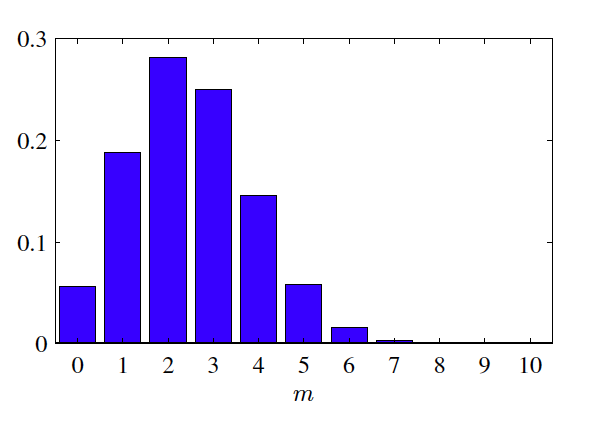

<center>图2.1 直方图画的是$N=10$，$\mu=0.25$，$m$函数的二项分布。</center>

二项分布的均值和方差可以在练习1.10中找到。它证明了独立性事件的和的均值就是均值的和，和的方差就是方差的和。因为$m = x_1 + \cdots + x_N$，对于每个观测的的均值（2.3）和方差（2.4），相应地，我们有

$$\mathbb{E}[m] = \sum_{m=0}^N m \text{Bin}(m \mid N, \mu) = N\mu$$

$$\text{var}[m] = \sum_{m=0}^N(m-\mathbb{E}[m])^2\text{Bin}(m \mid N, \mu) = N\mu(1-\mu)$$

这些结果都可以使用积分直接证明的。

#### 2.1.1 Beta分布

我们已经看到2.8中在伯努利分布中的参数$\mu$的最大似然设置，因此在二项分布中，它是由数据集中$x=1$的量给出的观测值。如我们所知，这对于小的数据集来说，会得到过拟合的结果。为了使用贝叶斯方法来处理这个问题，我们需要引入参数$\mu$上的先验分布$p(\mu)$。这里我们考虑这样一个先验分布，它很容易解释，也有着一些有用的可分析特性。为了得到先验，我们注意到似然函数的形式就是$\mu^x(1-\mu)^{1-x}$因子的乘积。如果我们选择一个先验与指数$\mu$和$1-\mu$成比例，那么后验分布，也与先验与似然函数的积成比例，它也会有与先验一样的功能形式。这个参数叫做共轭，我们将会在本章后面看到这些例子。而我们选择的先验，也称为beta分布，如下给出：

$$\text{Beta}(\mu \mid a, b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}$$

这里的$\Gamma$函数如1.141定义的，2.13中的系数确保了beta分布是标准化的，所以

$$\int_0^1\text{Beta}(\mu \mid a, b)d\mu = 1$$

beta分布的均值和方差如下：

$$\mathbb{E}[\mu] = \frac{a}{a+b}$$

$$\text{var}[\mu] = \frac{ab}{(a+b)^2(a+b+1)}$$

参数$a$和$b$经常被称为是超参数，是因为他们控制参数$\mu$的分布。图2.2表示是不同超参数下的beta分布。

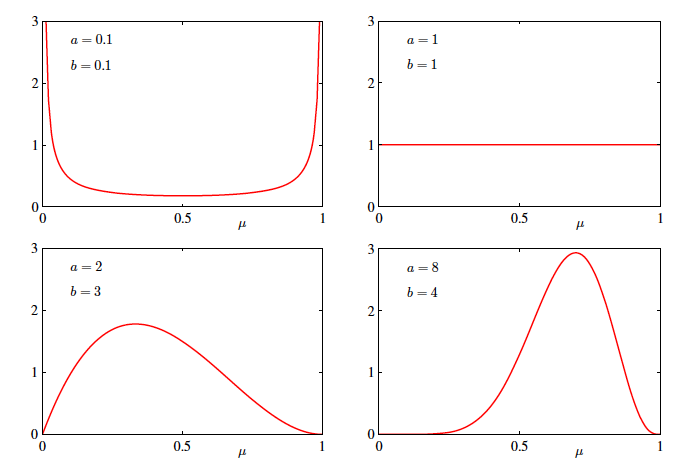

<center>图2.2 图中画的是不同超参数$a$和$b$对应的$\mu$的函数的beta分布$\text{Beta}(\mu \mid a, b)$。</center>

$\mu$的后验分布是通过2.13中的beta分布和2.9中的二项似然函数的乘积，然后再标准化得到的。这里只保留依赖$\mu$的因子，我们可导后验分布的形式如下：

$$p(\mu \mid m, l, a, b) \propto \mu^{m+a-1}(1-\mu)^{l+b-1}$$

这里$l=N-m$，在本例中，表示的是得到字的次数。我们可以看到2.17与先验分布同样是依赖$\mu$的函数，它反映了似然函数代表的先验的共轭性质。事实上，它是另一个beta分布，它的标准化系数可以通过与1.13比对得到：

$$p(\mu \mid m, l, a, b) = \frac{\Gamma(m+a+l+b)}{\Gamma(m+a)\Gamma(l+b)}\mu^{m+a-1}(1-\mu)^{l+b-1}$$

我们看到，$x=1$的$m$观测值与$x=0$的$l$观测值，是在$a$的基础上增加$m$，在$b$的基础上增加$l$，从先验到后验的过程。这里提供一个先验中超参数$a$和$b$，作为有效观测值$x=1$和$x=0$的简单解释。需要注意的是$a$和$b$都不一定是整数。进而，如果后续我们呢观测到新的数据，后验分布又可以作为先验分布。为了能够明白这一点，我们可以想象一次观测到一个数据，在观测后，通过与新观测数据的似然相乘更新当前的后验分布，然后归一化得到新的，修正后的后验分布。在每步中，后验，它是带着所有观测值，对于给定参数$a$和$b$的$x=1$和$x=0$的所有量（先验和实际观测）。$x=1$的额外观测值是简单地$a$增加1，$x=0$的观测值$b$增加1.图2.3中表述了这一步的过程。

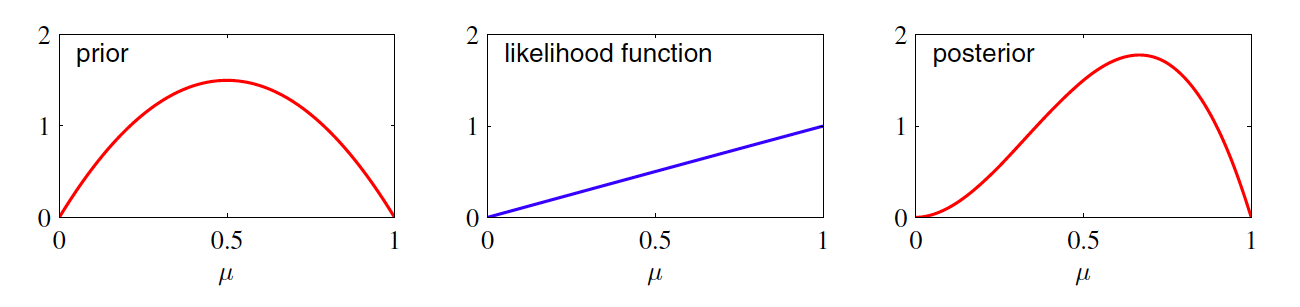

<center>图2.3 画出的是一步贝叶斯推断。先验是参数$a=2, b=2$的beta分布，似然函数，2.9给出的$N=m=1$，相应的只有一个观测$x=1$，所以后验分布是通过相应的参数$a=3, b=2$给出。</center>

我们看到当我们使用贝叶斯观点来学习的话，这个序列化方法也很自然。对于先验和似然函数的选择也是独立的，它仅依赖于独立同分布数据的假设。序列化学习一次只使用一个观测，或者很少批量，然后再下一次观测数据被使用前再丢掉。它们可以应用在，实时流数据学习场景，预测需要在知道所有数据之前就进行。而它们并不需要存储或加载所有的数据到内存，序列化方法对于有着大量数据的数据集也很有用。最大似然方法也可以用在序列化框架中。

如果我们的目标是尽可能预测下一次试验的结果，那么我们必须在给定观测数据集$\mathcal{D}$的情况下，评估$x$的分布。从概率加和乘积规则来看，则有：

$$p(x=1 \mid \mathcal{D}) = \int_0^1p(x=1 \mid \mu)p(\mu \mid \mathcal{D})d\mu = \int_0^1\mu p(\mu \mid \mathcal{D}) = \mathbb{E}[\mu \mid \mathcal{D}]$$

使用后验分布$p(\mu \mid \mathcal{D})$中的结果（2.18），和2.15中的beta分布的均值，我们得到：

$$p(x=1 \mid \mathcal{D}) = \frac{m+a}{m+a+l+b}$$

这简单解释了所有观测数据（包括真实观测和虚拟先验观测）对应$x=1$的情况。需要注意的是在一个无限制的大数据集$m, l \to ∞$，结果就变成2.8最大似然的结果。正如我们看到的，这是一个很常规的性质，贝爷和最大似然结果在无限制数据集上达成一致。对于有限数据集来说，后验均值$\mu$总是在先验均值和最大似然评估相应2.7中给出的频率事件之间。

从图2.2中，我们看到观测量的增长，后验分布也变得更加尖锐。这可以从2.6中的结果看到beta分布的方差变化，我们看到当$a \to ∞$，或$b \to ∞$时，方差变成0.事实上，我们可能希望这是贝叶斯学习的通用性质，随着我们观测的数据越来越多，后研粉的不确定性表示能够极速降低。

为了解决这个问题，我们可以使用频率的观点来处理贝叶斯学习，事实证明，平均而言，这样的特性也成立。考虑一个寻常的贝叶斯推断问题，对于参数$\theta$我们有观测数据集$\mathcal{D}$，以联合概率$p(\theta, \mathcal{D})$来表述如下结果：

$$\mathbb{E}[\mathbf{\theta}] = \mathbb{E}_{\mathcal{D}}[\mathbb{E}_{\theta}[\mathbf{\theta} \mid \mathcal{D}]]$$

这里

$$\mathbb{E}_{\theta}[\mathbf{\theta}] \equiv \int p(\mathbf{\theta})\mathbf{\theta}d\mathbf{\theta}$$

$$\mathbb{E}_{\mathcal{D}}[\mathbb{E}_{\theta}[\mathbf{\theta} \mid \mathcal{D}]] \equiv \int \left\{\int\mathbf{\theta}p(\mathbf{\theta} \mid \mathcal{D})d\mathbf{\theta}\right\}p(\mathcal{D})d\mathcal{D}$$

我们说后验均值$\mathbf{\theta}$，在生成数据分布上的均值，等于先验均值$\mathbf{\theta}$。类似地，我们可以证明

$$\text{var}_{\mathbf{\theta}}[\mathbf{\theta}] = \mathbb{E}[\text{var}_{\mathbf{\theta}}[\mathbf{\theta} \mid \mathcal{D}]] + \text{var}_{\mathcal{D}}[\mathbb{E}_{\mathbf{\theta}}[\mathbf{\theta} \mid \mathcal{D}]]$$

2.24左边部分是$\mathbf{\theta}$的先验方差。右边部分，第一项是$\mathbf{\theta}$的期望均值后验，第二项度量的是后验均值$\mathbf{\theta}$的方差，因为这个方差是一个正值，结果显示，平均来说，后验$\mathbf{\theta}$要小于先验方差。如果方差在后验均值中更大的话，方差的减少也就更大。需要注意的是，尽管，这个结果仅在均值上成立，而对于一个特别的观测数据集来说，可能后验方差要大于先验方差。

#### 2.2 多项变量

二项变量可以使用来描述两个可能只中的一个量。经常，我们还会遇到离散变量可以是$K$个可能互斥状态中的一个。尽管有很多替代的方法来表达这些变量，我们应该看到一个特别方便的表示就是1-of-K，它可以使用一个有$K$维的向量$\mathbf{x}$来表示，这个向量中只有一个元素$x_k$为1，而其它元素则为0。比如，假设我们有一个变量有着$K=6$种状态，其中有一个特别的变量观测，它相应的状态$x_3=1$，那么$\mathbf{x}$可以表示成：

$$\mathbf{x} = (0, 0, 1, 0, 0, 0)^T$$

需要注意的是这样的变量满足$\sum_{k=1}^Kx_k=1$。如果我们使用参数$\mu_k$来表示$x_k=1$的概率，那么$\mathbf{x}$的分布如下

$$p(\mathbf{x} \mid \mathbf{\mu}) = \prod_{k=1}^K\mu^{x_k}$$

这里$\mathbf{\mu}=(\mu_1,\cdots,\mu_K)^T$，参数$\mu_k$满足条件$\mu_k \ge 0$和$\sum_k\mu_k = 1$，因为它们表示的是概率。2.26中的分布可以伯努利分布更一般的多余2个的输出。很容易可以看到被标准化的分布：

$$\sum_{\mathbf{x}}p(\mathbf{x} \mid \mathbf{\mu}) = \sum_{k=1}^K\mu_k = 1$$

还有

$$\mathbb{E}[\mathbf{x} \mid \mathbf{\mu}] = \sum_{\mathbf{x}}p(\mathbf{x} \mid \mathbf{\mu})\mathbf{x} = (\mu_1,\cdots,\mu_M)^T = \mathbf{\mu}$$

现在考虑有一个数据集$\mathbf{D}$，有$N$个独立观测$\mathbf{x}_1, \cdots, \mathbf{x}_N$。相应的似然函数如下

$$p(\mathbf{D} \mid \mathbf{\mu}) = \prod_{n=1}^N\prod_{k=1}^K\mu_k^{x_{nk}} = \prod_{k=1}^K\mu_k^{\sum_nx_{nk}} = \prod_{k=1}^K\mu_k^{m_k}$$

我们看到似然函数依赖于$K$个量的$N$个数据点

$$m_k = \sum_nx_{nk}$$

这里表示的$x_k=1$的观测数。这里称作分布的充分。

为了找到最大似然解$\mathbf{\mu}$，我们需要最大化$\ln p(\mathcal{D} \mid \mathbf{\mu})$，同时要考虑$\mu_k$为1的条件。这可以使用拉格朗日乘子$\lambda$来求解，最大化如下

$$\sum_{k=1}^Km_k\ln \mu_k + \lambda(\sum_{k=1}^K\mu_k - 1)$$

对$\mu_k$求导，得到的式子令其为0，我们得到

$$\mu_k = -m_k/k$$

我们将解的拉格朗日乘子$\lambda$代入2.32中，有条件$\sum_k\mu_k = 1$，给到$\lambda = -N$。因此，我们得到最大似然解如下：

$$\mu_k^{\text{ML}} = \frac{m_k}{N}$$

它是$N$个观测值中$x_k = 1$的分数。

我们考联合分布量$m_1, \cdots, m_k$，我们以参数$\mathbf{\mu}$和观测总数$N$为条件。从2.29中则有

$$\text{Mult}(m_1,m_2,\cdots,m_K \mid \mathbf{\mu}, N) = \begin{pmatrix} N \\
m_1m_2 \cdots m_K\end{pmatrix}\prod_{k=1}^K\mu_k^{m_k}$$

我们称这位多项分布。标准化系数是将$N$对象划分成$K$组，大小为$m_1,\cdots,m_k$的个数，如下给出

$$\begin{pmatrix} N \\
m_1m_2 \cdots m_K\end{pmatrix} = \frac{N!}{m_1!m_2! \cdots m_K!}$$

需要注意的是变量$m_k$的条件

$$\sum_{k=1}^Km_k = N$$

#### 2.2.1 Dirichlet分布

我们现在介绍多项分布（2.34）参数${\mu_k}$的先验分布家族。通过观察多项分布，我们看到共轭先验如下给出

$$p(\mathbf{\mu} \mid \mathbf{\alpha}) \propto \prod_{k=1}^K\mu_k^{\alpha_{k - 1}}$$

其中，$0 \le \mu_k \le < 1$，$\sum_k\mu_k = 1$。这里$\alpha_1,\cdots,\alpha_K$是分布的参数，$\mathbf{\alpha}$表示$(\alpha_1,\cdots,\alpha_K)^T$。需要注意的是，因为求和约束，$\{\mu_k\}$空间上的分布受限于维度$K-1$（低一个维度的超平面）的简单型，如图2.4中的$K=3$。

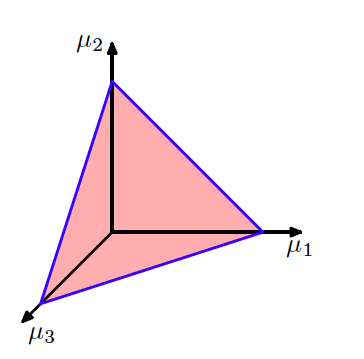

<center>图2.4 三个参数$\mu_1,\mu_2, \mu_3$上的Dirichlet分布受限于一个简单型（一个线性边界流），因此有条件$0 \le \mu_k \le 1$和$\sum_k\mu_k = 1$。</center>

这个分布的标注化形式如下

$$\text{Dir}(\mathbf{\mu} \mid \mathbf{\alpha}) = \frac{\Gamma(\alpha_0)}{\Gamma(\alpha_1)\cdots\Gamma(\alpha_K)}\prod_{k=1}^K\mu^{\alpha_k - 1}$$

这称作Dirichlet分布。这里$\Gamma(x)$是gamma函数定义如下

$$\alpha_0 = \sum_{k=1}^K\alpha_k$$

图中画的Dirichlet分布的简单型，是在多个参数$\alpha_k$上的设置，如图2.5所示。

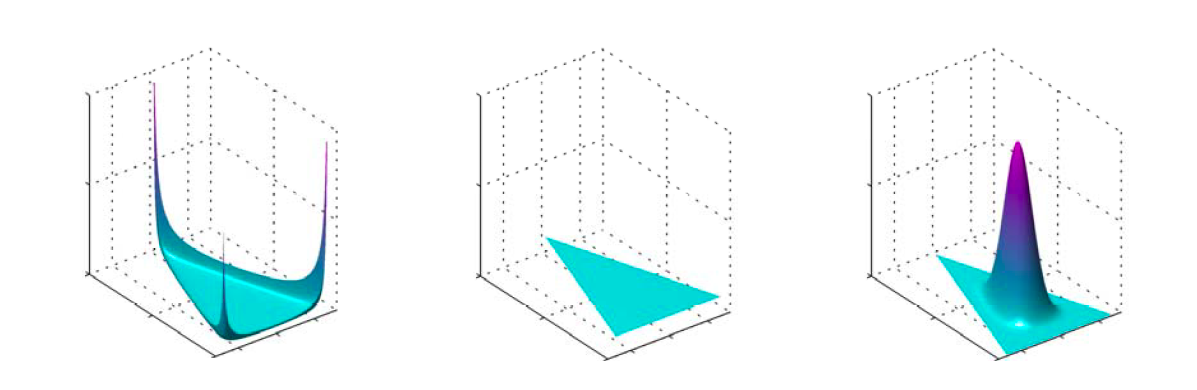

<center>图2.5 图中画的三个参数的Dirichlet分布，其中，两个水平轴关联到简单型的平面，水平轴是相应的密度值。这里左图中$\{\alpha_k\} = 0.1$，中间图$\{\alpha_k\} = 1$，右边图$\{\alpha_k\} = 10$。</center>

2.38中的先验乘以2.34中的似然函数，我们得到参数$\mathbf{\mu}_k$的后验分布

$$p(\mathbf{\mu} \mid \mathcal{D}, \mathbf{\alpha}) \varpropto p(\mathcal{D} \mid \mathbf{\mu}) \varpropto \prod_{k=1}^K\mu_k^{\alpha_k + m_k - 1}$$

我们可以看到后验分仍然是Dirichlet分布，可以确认Dirichlet分布事实上是多项分布的共轭先验。与2.38相比，这允许我们定义标准化系数如下

$$\begin{align*}p(\mathbf{\mu} \mid \mathcal{D}, \mathbf{\alpha}) &= \text{Dir}(\mathbf{\mu} \mid \mathbf{\alpha} + \mathbf{m}) \\
&= \frac{\Gamma(\alpha_0 + N)}{\Gamma(\alpha_1 + m_1)\cdots\Gamma(\alpha_1 + m_K)}\prod_{k=1}^K\mu_k^{\alpha_k + m_k - 1}\end{align*}$$

这里我们表示$\mathbf{m} = (m_1, \cdots, m_K)^T$。如二项分布的beta先验那样，我们可以将参数$\alpha_k$解释为Dirichlet先验的有限观测值$x_k=1$的数量。

需要注意的是二个状态量，要么可以表示为二进制变量，使用2.9中二项分布来建模，或者是1-of-2变量，使用2.34中的多项分布来建模，其中$K = 2$。

#### 2.3 高斯分布

高斯，又可称为正太分布，是连续变量分布中经常使用的模型。在单变量$x$的例子中，高斯分布可以写成如下形式：

$$\mathcal{N}(x \mid \mu, \sigma^2) = \frac{1}{2\pi\sigma^2}\text{exp}\left\{-\frac{1}{2\sigma^2}(x-\mu)^2\right\}$$

这里$\mu$是均值，$\sigma^2$是方差，对于$D$维向量$\mathbf{x}$，多变量高斯可以表示成如下形式

$$\mathcal{N}(\mathbf{x} \mid \mathbf{\mu}, \mathbf{\Sigma}) = \frac{1}{(2\pi)^{D/2}}\frac{1}{|\mathbf{\Sigma}|^{1/2}}\text{exp}\left\{-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^T\mathbf{\Sigma^{-1}}(\mathbf{x}-\mathbf{\mu})\right\}$$

这里$\mathbf{\mu}$是$D$维均值向量，$\mathbf{\Sigma}$是$D \times D$协方差矩阵，$|\mathbf{\Sigma}|$表示的是$\mathbf{\Sigma}$的行列式。

高斯分布由此产生不同内容都可以从不同视角来看。比如，我们已经看到对于单实数变量，分布的最大熵就是高斯。这个特性也可以用于多变量高斯。

另一个高斯分布的场景就是我们考虑多个随机变量的和。中心极限定理（源自拉普拉斯）告诉我们，出于某些条件，一系列随机变量的和，其本身还是随即变量，随着这些项数目的增加，其分布也变得越来越高斯（Walker, 1969年）。我们通过$N$个变量$x-1, \cdots, x_N$画出这个，其中每个$x$都是再区间$[0, 1]$之间的均匀分布，那么考虑分布的均值$(x_1 + \cdots + x_N) / N$。对于大的$N$来说，这个分布趋于高斯，如图2.6所示。在实际中，一个高斯的收敛与$N$的速度增加。因此这个结果在时2.9二项分布，这个在$m$上的分布是由包含$N$个观测随机比那里$x$的和，当$N \to ∞$时，趋于高斯（如图2.1中$N=10$的例子。）

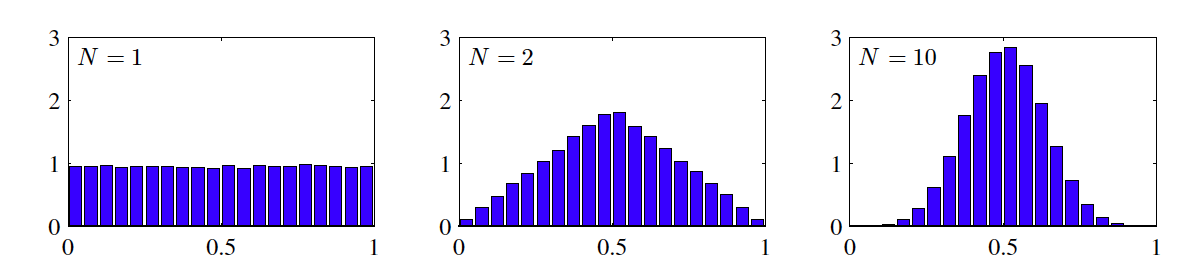

<center>图2.6 直方图画出的是对于不同的$N$值，它的均值分布。我们观测随着$N$的增长，分布趋于高斯。</center>

高斯分布有许多重要的分析性质，我们将会详细考虑这些。因此，这节会包含很多之前的内容，我们需要熟悉各种矩阵。尽管如此，我们强烈讲义读者专注于如何操作高斯分布，这些所使用的计数很多在理解后续章节中更加复杂的模型是没有用的。

我们以高斯分布的几何形式开始。高斯函数中与$\mathbf{x}$相关部分是一个二次型

$$\Delta^2 = (\mathbf{x} - \mathbf{\mu})^T\mathbf{\Sigma^{-1}}(\mathbf{x} - \mathbf{\mu})$$

它出现在指数中。这里的$\Delta$称为马氏距离，它是从$\mathbf{\mu}$到$\mathbf{x}$的距离，当$\mathbf{\Sigma}$是单位矩阵时，退化为欧式距离。对于二次型为常量的$\mathbf{x}$空间的表面，其高斯分布也是常量。

首先，我们注意到矩阵$\mathbf{\Sigma}$可以取对称矩阵，不失一般性，因为对于任意非对称矩阵都会从指数中消失。现在考虑协方差矩阵的特征向量等式：

$$\mathbf{\Sigma}\mathbf{u}_i = \lambda_i\mathbf{u}_i$$

其中$i = 1, \cdots, D$。因为$\mathbf{\Sigma}$是实数，对象矩阵它的特征值也是实数，它的特征向量是由一组相交向量集组成，所以

$$u_i^Tu_j = I_{ij}$$

其中$I_{ij}$是单位向量中$i, j$对应的元素，满足

$$I_{ij} = \begin{cases}
1, & \text{if} \hspace{0.2cm} i = j \\
0, & {\text{otherwise}}
\end{cases}$$

协方差矩阵$\mathbf{\Sigma}$可以表示成它相应的特征向量的形式：

$$\mathbf{\Sigma} = \sum_{i=1}^D\lambda_iu_iu_i^T$$

类似地，协方差的逆矩阵$\mathbf{\Sigma}^{-1}$可以表示成

$$\mathbf{\Sigma}^{-1} = \sum_{i=1}^D\frac{1}{\lambda_i}u_iu_i^T$$

将2.49代入到2.44中，二次型变成

$$\Delta^2 = \sum_{i=1}^D\frac{y_i^2}{\lambda_i}$$

其中我们定义

$$y_i = \mathbf{u}_i^T(\mathbf{x} - \mathbf{\mu})$$

我们可以将$\{y_i\}$解释成新的坐标系，有正交向量$\mathbf{u}_i$来定义，它是通过对原始$x_i$坐标系的偏移和旋转得到的。向量化形式$\mathbf{y} = (y_1, \cdots, y_D)^T$，我们有

$$\mathbf{y} = \mathbf{U}(\mathbf{x} - \mathbf{\mu})$$

这里$\mathbf{U}$是一个矩阵，它的行是通过$u_i^T$给出。从2.46中得知$\mathbf{U}$是一个正交矩阵，它满足$\mathbf{U}\mathbf{U}^T = \mathbf{I}$，因此也有$\mathbf{U}^T\mathbf{U} = \mathbf{I}$，这里$\mathbf{I}$是一个单位矩阵。

二次型和高斯密度在2.51不变的表面上是常量。如果所有的特征值$\lambda_i$都是正数，那么这些值构成的表示是一个椭球体，它们的中心$\mathbf{\mu}$，它们的坐标是沿着$\mathbf{u}_i$，并在这个方向上缩放相应的$\lambda_i^{1/2}$的量，如图2.7所示。

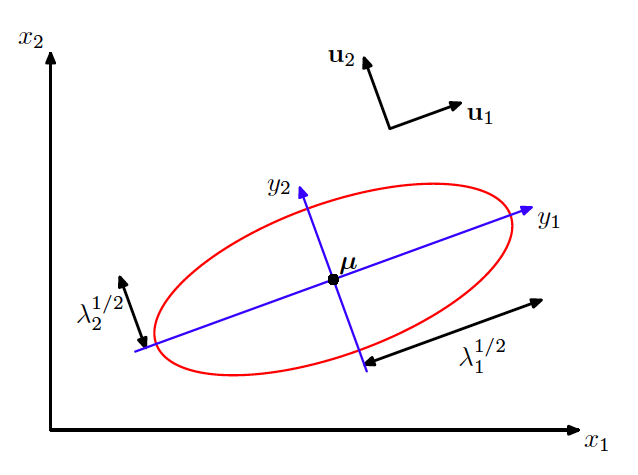

<center>图2.7 图中的红色曲线是二维空间$\mathbf{x} = (x_1, x_2)$中高斯等概率密度的椭圆表面，其密度是在$\mathbf{x} = \mathbf{\mu}$时$\text{exp}(-1/2)$的值。椭圆的主轴被定义为是协方差矩阵的特征向量$\mathbf{u}_i$与其相应特征值$\lambda_i$。</center>

对于良好定义的高斯，很有必要对于所有协方差的特征值$\lambda_i$要求为严格为正，否则，分布也就会不正常。一个矩阵它的特征值严格为正，那就说它是正定矩阵。在第12章中，我们会涉及一个或多个特征值是0的情况，这种情况下，分布是奇异的，仅限于低维子空间。如果所有特征值都非负，那么协方差矩阵被称作是半正定。

现在考虑高斯分布在新坐标系$y_i$的情形。从$\mathbf{x}$变成$\mathbf{y}$，我们有一个Jacobian矩阵$\mathbf{J}$有如下元素

$$J_{ij} = \frac{\partial x_i}{\partial y_i} = U_{ij}$$

其中$U_{ij}$是矩阵$\mathbf{U}^T$的元素。使用矩阵$\mathbf{U}$的正交特性，我们看到Jacobian矩阵行列式的平方是

$$|\mathbf{J}| = |\mathbf{U}^T|^2 = |\mathbf{U}^T||\mathbf{U}| = |\mathbf{U}^T\mathbf{U}| = |\mathbf{I}| = 1$$

因此$|\mathbf{J}| = 1$。所以，协方差矩阵行列式$\mathbf{\Sigma}$可以写成它特征值的乘积，如下

$$|\mathbf{\Sigma}|^{1/2} = \prod_{j=1}^D\lambda_j^{1/2}$$

因此在$y_i$坐标系中，高斯分布为如下形式

$$p(\mathbf{y}) = p(\mathbf{x})|\mathbf{J}| = \prod_{j=1}^D\frac{1}{2\pi\lambda_j}^{1/2}\text{exp}\left\{-\frac{y_j^2}{2\lambda_j}\right\}$$

它是$D$个独立单变量高斯分布的乘积。特征向量因此定义一个新的偏移和旋转坐标系来表达联合概率分布因式分解成独立分布的乘积。在$\mathbf{y}$坐标系中分布的积分是

$$\int p(\mathbf{y})d\mathbf{y} = \prod_{j=1}^D\int_{-∞}^∞\frac{1}{2\pi\lambda_j}^{1/2}\text{exp}\left\{-\frac{y_j^2}{2\lambda_j}\right\}dy_j = 1$$

其中我们使用结果1.48对单变量高斯标准化。这证实了多元高斯（2.43）确实是标准化的。

其中，我们使用了单变量高斯的结果（1.48）。这确定了多变量高斯（2.43）事实上也是标准化的。

我们现在看一下高斯分布，顺便解释下参数$\mathbf{\mu}$和$\mathbf{\Sigma}$。高斯分布$\mathbf{x}$的期望如下

$$\begin{align*}
\mathbb{E}[\mathbf{x}] &= \frac{1}{(2\pi)^{D/2}}\frac{1}{|\mathbf{\Sigma}|^{1/2}}\int \text{exp} \left\{-\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T\mathbf{\Sigma}^{-1}(\mathbf{x} - \mathbf{\mu})\right\}\mathbf{x}d\mathbf{x} \\
&= \frac{1}{(2\pi)^{D/2}}\frac{1}{|\mathbf{\Sigma}|^{1/2}}\int \text{exp} \left\{-\frac{1}{2}\mathbf{z}^T\mathbf{\Sigma}^{-1}\mathbf{z}\right\}(\mathbf{z} + \mathbf{x})d\mathbf{z} 
\end{align*}$$

其中我们使用$\mathbf{z} = \mathbf{x} - \mathbf{\mu}$来改变变量。我们现在注意到指数部分仍然是关于$\mathbf{z}$的函数，因为在这方面的积分范围是在$(-∞,∞)$，由于对称性因子$(\mathbf{x} + \mathbf{\mu})$中的$\mathbf{z}$项会消失。所以有

$$\mathbb{E}[\mathbf{x}] = \mathbf{\mu}$$

所以我们将$\mathbf{\mu}$看做是高斯分布的均值。

我们现在考虑高斯的二阶矩。在单变量例子中，我们考虑的二阶矩用$\mathbb{E}$表示。对于多变量高斯，有$D^2$的二阶矩用$\mathbb{E}[x_ix_j]$表示，我们可以将这些组成在一起而使用矩阵$\mathbb{E}[\mathbf{x}\mathbf{x}^T]$来表示。这个矩阵可以写成如下：

$$\begin{align*}
\mathbb{E}[\mathbf{x}\mathbf{x}^T] &= \frac{1}{(2\pi)^{D/2}}\frac{1}{|\mathbf{\Sigma}|^{1/2}}\int \text{exp} \left\{-\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T\mathbf{\Sigma}^{-1}(\mathbf{x} - \mathbf{\mu})\right\}\mathbf{x}\mathbf{x}^Td\mathbf{x} \\
&= \frac{1}{(2\pi)^{D/2}}\frac{1}{|\mathbf{\Sigma}|^{1/2}}\int \text{exp} \left\{-\frac{1}{2}\mathbf{z}^T\mathbf{\Sigma}^{-1}\mathbf{z}\right\}(\mathbf{z} + \mathbf{x})(\mathbf{z} + \mathbf{x})^Td\mathbf{z} 
\end{align*}$$

其中，仍然使用$\mathbf{z} = \mathbf{x} - \mathbf{\mu}$来表示。需要注意的是交叉项包含$\mathbf{\mu}\mathbf{z}^T$和$\mathbf{\mu}^T\mathbf{z}$仍然会由于对称性而消失。$\mathbf{\mu}\mathbf{\mu}^T$是一个常量，可以从积分中移除，它本身也会归一的，因为高斯分布就是标准化过的。考虑包含$\mathbf{z}\mathbf{z}^T$这项。同样，我们可以使用2.45中的协方差矩阵的特征向量扩展，与其相应的特征值绑定，写成如下

$$\sum_{j=1}^Dy_j\mathbf{u}_j$$

其中$y_j = \mathbf{u}_j^T\mathbf{z}$，给出如下：

$$\begin{align*}
&\frac{1}{(2\pi)^{D/2}}\frac{1}{|\mathbf{\Sigma}|^{1/2}}\int \text{exp} \left\{-\frac{1}{2}\mathbf{z}^T\mathbf{\Sigma}^{-1}\mathbf{z}\right\}\mathbf{z}\mathbf{z}^Td\mathbf{z} \\
&= \frac{1}{(2\pi)^{D/2}}\frac{1}{|\mathbf{\Sigma}|^{1/2}}\sum_{i=1}^D\sum_{j=1}^D\mathbf{u}_i\mathbf{u}_j^T\int\text{exp}\left\{-\sum_{k=1}^D\frac{y_k^2}{2\lambda_k}\right\}y_iy_jd\mathbf{y} \\
&= \sum_{i=1}^D\mathbf{u}_i\mathbf{u}_i^T\lambda_i = \mathbf{\Sigma}
\end{align*}$$

> 注：这边的推导，可参考前面的单变量高斯，另外会涉及到之前的几个等式。

这里我们使用了2.45中的特征向量等式，同时因为对称性中间右侧积分会消失的事实，最终我们使用了结果1.50和2.55，结合2.48。因此我们有

$$\mathbb{E}[\mathbf{x}\mathbf{x}^T] = \mathbf{\mu}\mathbf{\mu}^T + \mathbf{\Sigma}$$

对于单随机变量，我们在取二阶矩之后会减去均值来定义方差。相似地，在多变量的例子减去均值也很方便，它产生了一个随机向量$\mathbf{x}$的协方差定义如下

$$\text{cov}[\mathbf{x}] = \mathbb{E}[(\mathbf{x} - \mathbb{E}[\mathbf{x}])(\mathbf{x} - \mathbb{E}[\mathbf{x}])^T]$$

对于高斯分布的一个特定例子，我们会用$\mathbb{E}[\mathbf{x}] = \mathbf{\mu}$来表示，同时从结果2.62中，我们有

$$\text{cov}[\mathbf{x}] = \mathbf{\Sigma}$$

> 注：对于样本数据的二阶矩，它包含样本的方差，和均值的方差构成。

因为参数矩阵$\mathbf{\Sigma}$表示的是在高斯分布$\mathbf{x}$下的协方差，也被称作协方差矩阵。

尽管2.43中的高斯分布广泛用于密度模型，这也会存在一些局限性。考虑在分布中的自由参数。一个普通的对称矩阵$\mathbf{\Sigma}$它有$D(D+1)/2$独立参数，另外在$\mathbf{\mu}$中有$D$个独立参数，总共有$D(D+3)/2$个参数。对于大的$D$来说，所有参数量也是$D$的二次方增长，这将导致计算量的增长，对于大的逆矩阵来说也将变得不可能。一种解决这个问题的办法，就是使用受限的协方差矩阵。如果我们考虑协方差矩阵是对角的，则有$\mathbf{\Sigma} = \text{diag}(\sigma_i^2)$，在密度模型中我们共有$2D$（$\sqrt{D^2 + D^2} = 2D$）个独立参数。常量密度的相应等高线以轴对称椭圆所示。我们可以更进一步地限制协方差矩阵与单位矩阵成比例，$\mathbf{\Sigma} = \sigma^2\mathbf{I}$，这被称为同性协方差，给定模型中$D+1$个独立参数和常量密度的球星表面。普通，对角，同性协方差的三种可能如图2.8所示。不幸的是，这种方法会限制分布中自由度的数量，使得计算协方差矩阵的逆变成容易，但他们也极大地限制了概率密度的形式，限制了它可能抓取到的数据中的相关性。

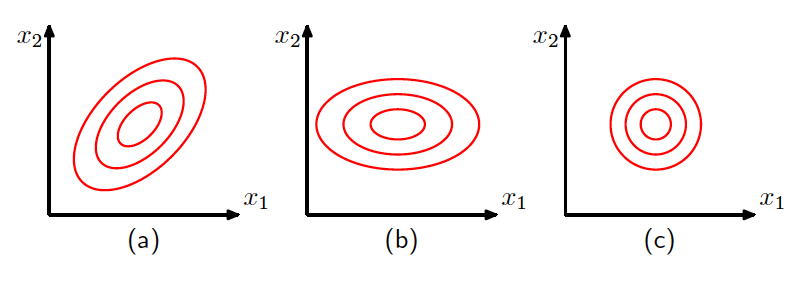

<center>图2.8 二维高斯分布的常量概率密度的等高线，普通形式的协方差矩阵如(a)，(b)为对角线形式，它相应的椭圆是与坐标轴对其的，(c)是成比例与单位矩阵，它的等高线是同心圆。</center>

高斯分布的进一步限制是它本质上的单峰性（只有一个最大值），同时所以对于多变量分布来说，它也不能提供一个很好的近似。因此，对于高斯分布来说，有太多参数，既可以很灵活，但也会局限于它所能充分表示的分布范围。后面我们介绍潜变量，也称为隐变量，或者是未观测变量，它可以解决我们这里的问题。特别的，在多态分布家族中，通过引入离散潜变量会得到混合高斯，会在2.3.9节中讨论。相似地，连续潜变量的介绍，会在第12章介绍，它所建模型的自由参数能够通过控制数据空间中独立性维度$D$的同时，也不会影响捕获数据中的领域相关性。事实上，这两种方法可以组合，进一步扩展得到一系列的层叠模型，可以适用于更宽广的实际应用。比如，高斯版本的隐马尔可夫随机场，它就广泛应用于图像概率模型，是高斯分布在像素强度的联合空间上，通过更易处理的方法来反应像素组织空间。类似地，线性动态系统，被用于对诸如追踪程序的时间序列的数据应用，它是在潜在大量观测和潜变量上的联合高斯分布，这样也使得分布上的结构也更易于处理。一个表示复杂分布性质和表达形式的强大的框架，就是概率图模型，我们会在第8章来重点介绍。